# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('darkgrid')
%matplotlib inline

# Loading Data

In [3]:
messages = [line.rstrip() for line in open('Restaurant_Reviews.tsv')]
print(len(messages))

1001


In [5]:
for message_no, messages in enumerate(messages[:10]):
    print(message_no, messages)
    print('\n')

0 Review	Liked


1 Wow... Loved this place.	1


2 Crust is not good.	0


3 Not tasty and the texture was just nasty.	0


4 Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1


5 The selection on the menu was great and so were the prices.	1


6 Now I am getting angry and I want my damn pho.	0


7 Honeslty it didn't taste THAT fresh.)	0


8 The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0


9 The fries were great too.	1




In [6]:
# Importing data
messages = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

In [7]:
messages.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
messages.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
messages.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
# Checking for missing values 
messages.isnull().sum()

Review    0
Liked     0
dtype: int64

In [12]:
# Count of value 'liked'
messages.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [13]:
messages['Length'] = messages['Review'].apply(len)
messages.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


# Data Visualizations

<AxesSubplot:ylabel='Frequency'>

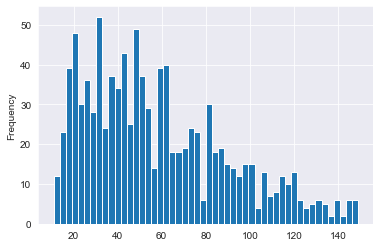

In [25]:
# Inspeacing length of messages 
messages['Length'].plot(bins=50, kind='hist') 

In [26]:
messages.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [28]:
messages[messages['Length'] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [29]:
messages[messages['Length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

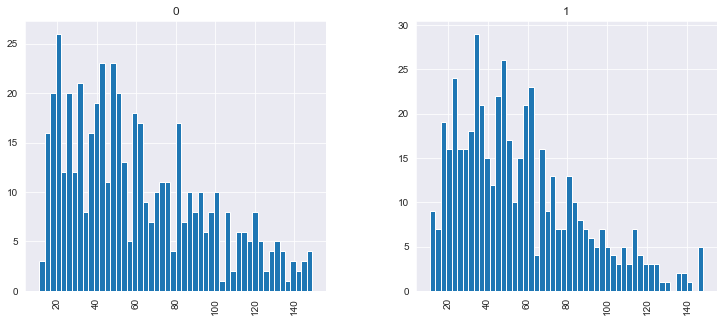

In [30]:
# Comparing length of messages according to category
messages.hist(column='Length', by='Liked', bins=50, figsize=(12,5))

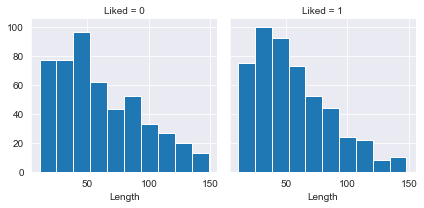

In [32]:
g = sns.FacetGrid(messages,col='Liked')
g.map(plt.hist,'Length')

<AxesSubplot:xlabel='Liked', ylabel='count'>

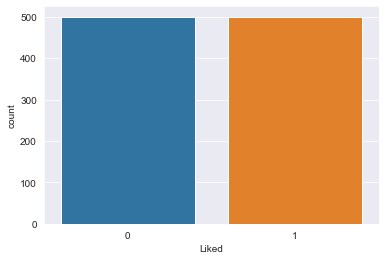

In [31]:
sns.countplot(x='Liked', data=messages)

In [34]:
messages.corr()

,Liked,Length
Liked,1.000000,-0.075285
Length,-0.075285,1.000000


<AxesSubplot:>

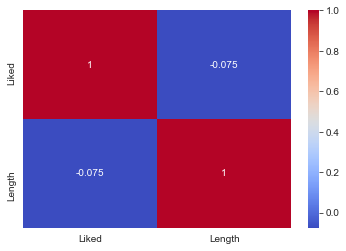

In [36]:
sns.heatmap(messages.corr(), annot=True, cmap='coolwarm')

# NLP Classification

In [37]:
X = messages['Review']
y = messages['Liked']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv = CountVectorizer()

In [40]:
X = cv.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
nb = MultinomialNB()

In [45]:
nb.fit(X_train,y_train)

MultinomialNB()

# Predictions and Evaluations

In [46]:
predictions = nb.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[115  35]
 [ 30 120]]


              precision    recall  f1-score   support

           0       0.79      0.77      0.78       150
           1       0.77      0.80      0.79       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



# Using Text Processing

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [52]:
X = messages['Review']
y = messages['Liked']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [53]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [54]:
predictions = pipeline.predict(X_test)

In [55]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[111  39]
 [ 23 127]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       150
           1       0.77      0.85      0.80       150

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300

